In [1]:


import requests
import pandas as pd
import numpy as np

import json
import requests
from pandas.io.json import json_normalize

!pip install git+https://github.com/psychemedia/ipython_magic_folium.git
!pip install geocoder
!pip install folium

import geocoder
from geopy.geocoders import Nominatim
import folium
import sklearn
from sklearn.cluster import KMeans

%matplotlib inline
import matplotlib.pyplot as plt



  Cloning https://github.com/psychemedia/ipython_magic_folium.git to /tmp/wsuser/pip-req-build-0tqiw7hy
  Running command git clone -q https://github.com/psychemedia/ipython_magic_folium.git /tmp/wsuser/pip-req-build-0tqiw7hy
     |████████████████████████████████| 94 kB 5.4 MB/s  eta 0:00:01
     |████████████████████████████████| 14.8 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 16.2 MB/s eta 0:00:01
  Created wheel for ipython-magic-folium: filename=ipython_magic_folium-0.0.0-py3-none-any.whl size=5946 sha256=3a92bce7bb993c8610a488de0c5f59d379b391963dec326bde2fbbeda3166fbb
  Stored in directory: /tmp/wsuser/pip-ephem-wheel-cache-udoji8z6/wheels/60/80/f3/da41a4961e6eea1db3a46e0bba621f9cd945089c2070fc3676
Successfully built ipython-magic-folium


<h1><center>Data showing Major professional sports teams of the United States and Canada</center><h1>

In [2]:
url = "https://en.wikipedia.org/wiki/Major_professional_sports_teams_of_the_United_States_and_Canada"
response2 = requests.get(url)
df_canada = pd.read_html(response2.content, header=0)[0]
df_canada.drop(columns=['Ref'])
df_canada.set_index('Team', inplace=True)

df = df_canada.drop(columns=['Ref', 'Franchise notes'])
df.head()

,Venue,City,State/Province,League,Est.
Team,,,,,
Anaheim Ducks,Honda Center,Anaheim,California,NHL,1993
Arizona Cardinals,State Farm Stadium,Glendale,Arizona,NFL,1988
Arizona Coyotes,Gila River Arena,Glendale,Arizona,NHL,1996
Arizona Diamondbacks,Chase Field,Phoenix,Arizona,MLB,1998
Atlanta Braves,Truist Park,Atlanta,Georgia,MLB,1966


In [3]:
df['City'].value_counts()

New York City    7
Chicago          6
Los Angeles      5
Toronto          5
Denver           4
                ..
Newark           1
Jacksonville     1
Regina           1
Buffalo          1
Miami Gardens    1
Name: City, Length: 76, dtype: int64

In [4]:
number_of_cities = pd.read_csv("https://raw.githubusercontent.com/aaron1986/Coursera_Capstone/master/numbers_of_cities.csv")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

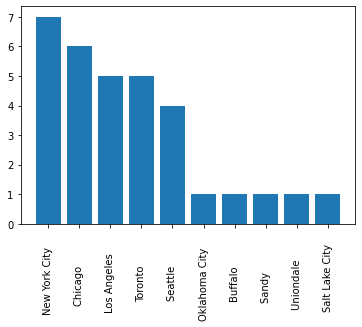

In [5]:
plt.bar(x=number_of_cities['Cities'],height=number_of_cities['Values'])
plt.xticks(rotation=90)

<h1>New York City Sports Teams</h1>

In [6]:
url = "https://en.wikipedia.org/wiki/List_of_New_York_City_metropolitan_area_sports_teams"
response2 = requests.get(url)
df_new_york = pd.read_html(response2.content, header=0)[0]
df_new_york.set_index('Club', inplace=True)

df_new_york_teams = df_new_york.drop(columns=['Home Game Television Network','Radio Network'])
df_new_york_teams.head()

,League,Venue,Capacity,Location,Established,Championships
Club,,,,,,
New York Yankees,MLB Baseball,Yankee Stadium,50291,"Bronx, New York",1901,27
New York Giants,NFL Football,MetLife Stadium,82566,"East Rutherford, New Jersey",1925,8
New York Rangers,NHL Ice Hockey,Madison Square Garden,"17,200 (Hockey)","New York, New York (Manhattan)",1926,4
New York Knicks,NBA Basketball,Madison Square Garden,"19,033 (Basketball)","New York, New York (Manhattan)",1946,2
New York Jets,NFL Football,MetLife Stadium,82566,"East Rutherford, New Jersey",1960,1


<h1>Toronto Sports Teams</h1>

In [7]:
url = "https://github.com/aaron1986/Coursera_Capstone/blob/master/Canada.csv"
response2 = requests.get(url)
df_toronto = pd.read_html(response2.content, header=0)[0]
df_toronto.set_index('Club', inplace=True)
df_toronto.drop('Unnamed: 0', axis=1, inplace=True)
df_toronto.head(20)

,League,Venue,Capacity,Location,Established,Championships
Club,,,,,,
Toronto Blue Jays,MLB,Rogers Centre,49282,"Toronto, Ontario",1977,2
Toronto Argonauts,CFL,BMO Field,25000,"Toronto, Ontario",1873,17
Toronto FC,MLS,BMO Field,30000,"Toronto, Ontario",2007,1
Toronto Maple Leafs,NHL,Scotiabank Arena,18800,"Toronto, Ontario",1923,13
Toronto Raptors,NBA,Scotiabank Arena,19800,"Toronto, Ontario",1995,1


<h1><center>Visualization of the areas (both New York City and Toronto) where sport teams are located.</center></h1>

In [8]:
url = "https://github.com/aaron1986/Coursera_Capstone/blob/master/stadium_can.csv"
response2 = requests.get(url)
df_can_geo = pd.read_html(response2.content, header=0)[0]
df_can_geo.set_index('Team', inplace=True)
df_can_geo.drop('Unnamed: 0', axis=1, inplace=True)

df_can_geo.dropna(inplace = True)

In [9]:
df_can_geo.head()

,Venue,Address,Latitude,Longitude
Team,,,,
Toronto Blue Jays,Rogers Centre,"1 Blue Jays Way, Toronto, ON M5V 1J1, Canada",43.641912,-79.388768
Toronto Argonauts,BMO Field,"170 Princes' Blvd, Toronto, ON M6K 3C3, Canada",43.633396,-79.417997
Toronto FC,BMO Field,"170 Princes' Blvd, Toronto, ON M6K 3C3, Canada",43.633396,-79.417997
Toronto Maple Leafs,Scotiabank Arena,"40 Bay St, Toronto, ON M5J 2X2, Canada",43.644230,-79.378374
Toronto Raptors,Scotiabank Arena,"40 Bay St, Toronto, ON M5J 2X2, Canada",43.644230,-79.378374


In [10]:
address = 'New York'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [11]:
# create map of Toronto using latitude and longitude values
map_stadium = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng,Venue in zip(df_can_geo['Latitude'], df_can_geo['Longitude'], df_can_geo['Venue']):
    label = '{}, {}'.format(latitude, Venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=1,
        ).add_to(map_stadium)  
    
map_stadium

In [12]:
url = "https://raw.githubusercontent.com/aaron1986/Coursera_Capstone/master/toronto.csv"
df_map = pd.read_csv(url)
df_map.head(20)

,Neighbourhood,Latitude,Longitude
0,Central Bay Street,43.657952,-79.387383
1,Lake Shore Blvd,43.630572,-79.419629
2,Gardiner Expy,43.636567,-79.415960
3,Front St W,43.640515,-79.388423


In [13]:
address = 'Toronto'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [14]:
# create map of Toronto using latitude and longitude values
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, Neighbourhood in zip(df_map['Latitude'], df_map['Longitude'], df_map['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, latitude)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill_color='green',
        fill=True,
        fill_opacity=1,
        ).add_to(map_Toronto)  
    
map_Toronto

In [15]:
CLIENT_ID = 'RT5PLOZFD0HDEN2YCY1O3YBSR050VXP1MIRES0Y3QUNU3P0Y' # your Foursquare ID
CLIENT_SECRET = 'MY0UUKHAZU34WTZT1JSPB5LWTGFTT03UT4KGSIM0XGNE2TTD' # your Foursquare Secret
VERSION = '20210101' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RT5PLOZFD0HDEN2YCY1O3YBSR050VXP1MIRES0Y3QUNU3P0Y
CLIENT_SECRET:MY0UUKHAZU34WTZT1JSPB5LWTGFTT03UT4KGSIM0XGNE2TTD


<h1><center>Top 100 venues that are in the three areas where the Stadiums are situated in Toronto also within a radius of 150 meters.</center><h1>

In [16]:
radius = 150
LIMIT = 100

venues = []

for lat, long, neighbourhood in zip(df_map['Latitude'], df_map['Longitude'], df_map['Neighbourhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighbourhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [17]:
venues_df = pd.DataFrame(venues)

venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighbourhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head(20)



(14, 7)


,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.657399,-79.388313,Coffee Shop
1,Central Bay Street,43.657952,-79.387383,Starbucks,43.658204,-79.388998,Coffee Shop
2,Central Bay Street,43.657952,-79.387383,Booster Juice,43.658657,-79.388682,Smoothie Shop
3,Central Bay Street,43.657952,-79.387383,Subway,43.657380,-79.387432,Sandwich Place
4,Central Bay Street,43.657952,-79.387383,Shoppers Drug Mart,43.657566,-79.388477,Pharmacy
5,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.657553,-79.388534,Coffee Shop
6,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.658906,-79.388696,Coffee Shop
7,Gardiner Expy,43.636567,-79.415960,Coca-Cola Coliseum,43.635629,-79.415030,Hockey Arena
8,Gardiner Expy,43.636567,-79.415960,Smoke's Poutinerie,43.636029,-79.415059,Poutine Place
9,Gardiner Expy,43.636567,-79.415960,Exhibition TTC Loop,43.635915,-79.416009,Light Rail Station


In [18]:

# one hot encoding
toronto_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = venues_df['Neighbourhood'] 

# move neighborhood column to the first column
# first: find index of neighborhood column
index = 0
for idx, element in enumerate(toronto_onehot.columns):
    if element == 'Neighbourhood':
        index = idx
fixed_columns = [toronto_onehot.columns[index]] + [v for idx,v in enumerate(toronto_onehot.columns) if idx != index]
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Bar,Baseball Field,Baseball Stadium,Coffee Shop,Hockey Arena,Light Rail Station,Pharmacy,Poutine Place,Sandwich Place,Smoothie Shop
0,Central Bay Street,0,0,0,1,0,0,0,0,0,0
1,Central Bay Street,0,0,0,1,0,0,0,0,0,0
2,Central Bay Street,0,0,0,0,0,0,0,0,0,1
3,Central Bay Street,0,0,0,0,0,0,0,0,1,0
4,Central Bay Street,0,0,0,0,0,0,1,0,0,0


In [19]:
toronto_onehot.shape

(14, 11)

In [20]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Bar,Baseball Field,Baseball Stadium,Coffee Shop,Hockey Arena,Light Rail Station,Pharmacy,Poutine Place,Sandwich Place,Smoothie Shop
0,Central Bay Street,0.00,0.00,0.0,0.571429,0.000000,0.000000,0.142857,0.000000,0.142857,0.142857
1,Front St W,0.25,0.25,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Gardiner Expy,0.00,0.00,0.0,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000


<h1>Cluster Neighborhoods</h1>
<h2>Run k-means to cluster the neighborhood into 3 clusters.</h2>

In [21]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:40]

array([0, 1, 2], dtype=int32)

In [22]:
# add cluster levels to dataframe
toronto_grouped.insert(1, 'Cluster', kmeans.labels_)
toronto_grouped.head()

,Neighbourhood,Cluster,Bar,Baseball Field,Baseball Stadium,Coffee Shop,Hockey Arena,Light Rail Station,Pharmacy,Poutine Place,Sandwich Place,Smoothie Shop
0,Central Bay Street,0,0.00,0.00,0.0,0.571429,0.000000,0.000000,0.142857,0.000000,0.142857,0.142857
1,Front St W,1,0.25,0.25,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Gardiner Expy,2,0.00,0.00,0.0,0.000000,0.333333,0.333333,0.000000,0.333333,0.000000,0.000000


In [23]:
toronto_merged = venues_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_grouped.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory,Cluster,Bar,Baseball Field,Baseball Stadium,Coffee Shop,Hockey Arena,Light Rail Station,Pharmacy,Poutine Place,Sandwich Place,Smoothie Shop
0,Central Bay Street,43.657952,-79.387383,Tim Hortons,43.657399,-79.388313,Coffee Shop,0,0.0,0.0,0.0,0.571429,0.0,0.0,0.142857,0.0,0.142857,0.142857
1,Central Bay Street,43.657952,-79.387383,Starbucks,43.658204,-79.388998,Coffee Shop,0,0.0,0.0,0.0,0.571429,0.0,0.0,0.142857,0.0,0.142857,0.142857
2,Central Bay Street,43.657952,-79.387383,Booster Juice,43.658657,-79.388682,Smoothie Shop,0,0.0,0.0,0.0,0.571429,0.0,0.0,0.142857,0.0,0.142857,0.142857
3,Central Bay Street,43.657952,-79.387383,Subway,43.657380,-79.387432,Sandwich Place,0,0.0,0.0,0.0,0.571429,0.0,0.0,0.142857,0.0,0.142857,0.142857
4,Central Bay Street,43.657952,-79.387383,Shoppers Drug Mart,43.657566,-79.388477,Pharmacy,0,0.0,0.0,0.0,0.571429,0.0,0.0,0.142857,0.0,0.142857,0.142857


In [24]:
import matplotlib.cm as cm
import matplotlib.colors as colors

<h1>Visualize the resulting clusters</h1>

In [27]:
# create map
latitude = toronto_merged['VenueLatitude'][0]
longitude = toronto_merged['VenueLongitude'][0]
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['VenueLatitude'], toronto_merged['VenueLongitude'], toronto_merged['VenueName'], toronto_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters